In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from functools import partial
import matplotlib.pyplot as plt

# Inpupt

In [2]:
# x is an input vector (random with mean of 0 and standard deviation of 1)
inp = torch.randn(512)
print("Mean:", inp.mean())
print("Desv:", inp.std())
print("Hist:", inp.histc(40,0,10))

Mean: tensor(0.0175)
Desv: tensor(0.9691)
Hist: tensor([64., 53., 52., 29., 27., 17., 13., 10.,  6.,  4.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])


# Networks blocks

In [3]:
def lin_block(feats):
    return nn.Sequential(
        nn.Linear(feats, feats),
        nn.ReLU()
    )

def lin_bn_block(feats):
    return nn.Sequential(
        nn.Linear(feats, feats),
        nn.BatchNorm2d(feats),
        nn.ReLU()
    )

def cnn_block(feats):
    return nn.Sequential(
        nn.Conv2d(feats, feats, kernel_size=3, padding=1),
        nn.ReLU()
    )

def cnn_bn_block(feats):
    return nn.Sequential(
        nn.Conv2d(feats, feats, kernel_size=3, padding=1),
        nn.BatchNorm2d(feats),
        nn.ReLU()
    )

In [4]:
class ResBlock(nn.Module):

    def __init__(self, i, o):
        super(ResBlock, self).__init__()
        self.conv1 = nn.Conv2d(i, o, 3)
        self.bn1   = nn.BatchNorm2d(o)
        self.relu  = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(i, o, 3)
        self.bn2   = nn.BatchNorm2d(o)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += x
        out = self.relu(out)

        return out

# Networks

In [5]:
feats  = 512
layers = 10

lin    = nn.Sequential(*[lin_block(feats)    for _ in range(layers)])
cnn    = nn.Sequential(*[cnn_block(feats)    for _ in range(layers)])
lin_bn = nn.Sequential(*[lin_bn_block(feats) for _ in range(layers)])
cnn_bn = nn.Sequential(*[cnn_bn_block(feats) for _ in range(layers)])

In [6]:
model = lin

for name, l in model.named_children(): # named_modules
    print(name)

0
1
2
3
4
5
6
7
8
9


In [7]:
class ActivationStats():
    
    def __init__(self, model):
        self.n_layers = len(model)
        self.means = [[] for _ in model]
        self.stds  = [[] for _ in model]
        self.hists = [[] for _ in model]
        
        for i, l in enumerate(model.children()):
            l.register_forward_hook(partial(self.append_stats, i))
            
    def append_stats(self, i, layer, inp, out):
        self.means[i].append(out.data.mean())
        self.stds[i].append(out.data.std())
        self.hists[i].append(out.data.histc(40,0,10))
        
    def plot_means(self):
        for l in stats.means:
            plt.plot(l)
        plt.title('Means',fontsize=14)
        plt.legend(["layer "+str(i) for i in range(1, self.n_layers+1)], loc='upper right');
    def plot_stds(self):
        for l in stats.stds:
            plt.plot(l)
        plt.title('Stds',fontsize=14)
        plt.legend(["layer "+str(i) for i in range(1, self.n_layers+1)], loc='upper right');
        
    def plot_hist(self, layer_i=1): # 1,2,3,4
        hist_tensor = torch.stack(stats.hists[layer_i-1]).t().float().log1p()
        plt.imshow(hist_tensor, origin='lower')
        plt.title('Histogram of layer '+str(layer_i), fontsize=14)
        plt.xlabel('Iterations')
        plt.ylabel('Activation values')
        
stats = ActivationStats(model)
stats.means, stats.stds, stats.hists

([[], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], []])

In [8]:
model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);
model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);
model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);
model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);model(inp);

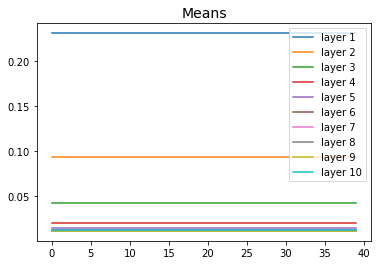

In [9]:
stats.plot_means()

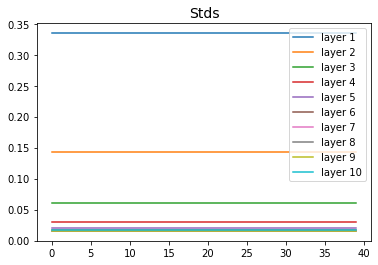

In [10]:
stats.plot_stds()

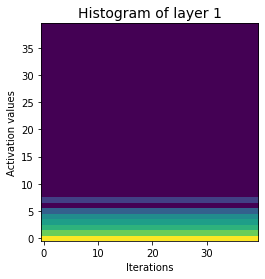

In [11]:
stats.plot_hist(1)

# FIN

In [12]:
    # initialization function, first checks the module type,
    # then applies the desired changes to the weights
    def init_normal(m):
        if type(m) == nn.Linear:
            nn.init.uniform_(m.weight)

    # use the modules apply function to recursively apply the initialization
    rand_net.apply(init_normal)

NameError: name 'rand_net' is not defined

In [10]:
# linear is a linear layer with output of size 512 (matrix 512x512)
linear = torch.nn.Linear(512, 512)

# we initialize the weight of the linear layer with random number (mean of 0 and standard deviation of 1)
torch.nn.init.normal_(linear.weight, mean=0, std=1)

# We simulate the foward pass of a neural net with 50 layers
for i in range(50): 
    x = F.relu(linear(x))
    
    #We check the stats at some layers
    if i % 10 == 0:
        print(f'Layer {i}: {x.mean()},{x.std()} ')
    
# We get exploding gradient (not a number results)
x.mean(),x.std()

Layer 0: 8.439531326293945,12.308940887451172 
Layer 10: 11093494726656.0,15686622511104.0 
Layer 20: 1.477169494438928e+25,2.1607411509141955e+25 
Layer 30: inf,3.032787889684707e+37 
Layer 40: nan,nan 


(tensor(nan, grad_fn=<MeanBackward0>), tensor(nan, grad_fn=<StdBackward0>))